In [6]:
def is_notebook() -> bool:
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter

In [7]:
os.getcwd()

'/home/ignacio-rosa/code/ignacio-rosa/project-ais/code/data_handling/reddit'

In [8]:
import pandas as pd
#import numpy as np
import os

try:
    pwd = os.path.abspath(__file__)
    path_data = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(pwd))),
                             'raw_data')
    path_clean = os.path.join(path_data, 'reddit_clean')
except:
    if is_notebook() == True:
        pwd = os.getcwd()
        path_data = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(pwd))),
                                 'raw_data')
        path_clean = os.path.join(path_data, 'reddit_clean')
    else:
        pwd = os.getcwd()
        path_data = os.path.join(pwd, 'raw_data')
        path_clean = os.path.join(path_data, 'reddit_clean')

df = pd.read_csv(f'{path_clean}/subreddit_clean_filtered.csv',
                 sep=',', escapechar='\\')
df['created'] = pd.to_datetime(df['created'])
df['ym'] = df['created'].apply(lambda x: int(str(x.year) + str(x.month+100)[-2:]))
df = df[df['ym']>=201301]
_dups = df[['id', 'ticker']].groupby('id').count()
_dups = _dups.rename(columns={'ticker': 'dups'})
df = pd.merge(df, _dups, on='id', how='left')
df['dups'] = df['dups'].apply(lambda x: 1 if x > 1 else 0)
df_pivot = pd.pivot_table(df, index=['ticker', 'ym', 'dups'],
                          values='id', aggfunc='count').reset_index()

In [30]:
import seaborn as sns
df_meanTicker = df_pivot[['ticker', 'ym', 'id']].groupby(['ticker', 'ym'], as_index=False).sum()
df_meanTicker = df_meanTicker[['ticker', 'id']].groupby(['ticker'], as_index=False).mean()
df_meanTicker.head()

,ticker,id
0,A,338.291667
1,AAL,12.008850
2,AAP,3.400000
3,AAPL,149.800000
4,ABBV,6.200000


<Axes: xlabel='id', ylabel='Count'>

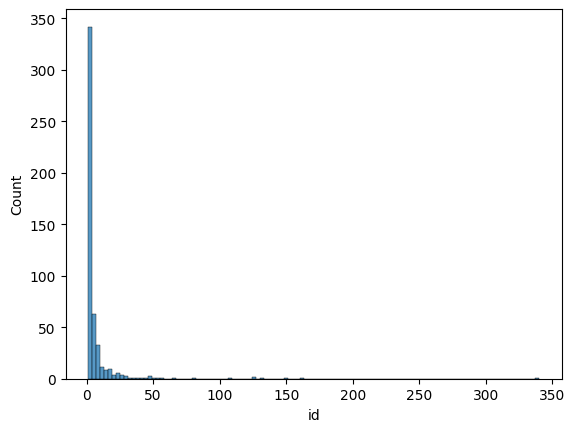

In [31]:
sns.histplot(df_meanTicker['id'], binwidth=3)

In [32]:
df_meanTicker.head()

,ticker,id
0,A,338.291667
1,AAL,12.008850
2,AAP,3.400000
3,AAPL,149.800000
4,ABBV,6.200000


In [33]:
df_meanTicker.to_csv(f'{path_clean}/average_submissions_10years.csv', index=False)

In [34]:
path_clean

'/home/ignacio-rosa/code/ignacio-rosa/project-ais/raw_data/reddit_clean'